In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Explore Data



In [44]:
# Load Data
train_df = pd.read_csv("datasets/Airline Passanger Satisfaction/train.csv")
test_df = pd.read_csv("datasets/Airline Passanger Satisfaction/test.csv")

train_df["type"] = "train"
test_df["type"] = "test"

df = pd.concat([train_df, test_df], ignore_index=True).drop("Unnamed: 0", axis=1).set_index("id")

display(df.head())


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,type
id,,,,,,,,,,,,,,,,,,,,,
70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,train
5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,train
110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,4,3,4,4,4,5,0,0.0,satisfied,train
24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,train
119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,4,4,3,3,3,0,0.0,satisfied,train


In [3]:
# Check Data Shape
df.shape

(129880, 24)

In [4]:
# Check Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 70172 to 34799
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    129880

In [5]:
# Check Null Values
df.isnull().sum() / df.shape[0] * 100

Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                          0.000000
Departure Delay in Minutes           0.000000
Arrival Delay in Minutes          

In [6]:
# Check Data Description
display(df.describe())

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Check Data Distribution

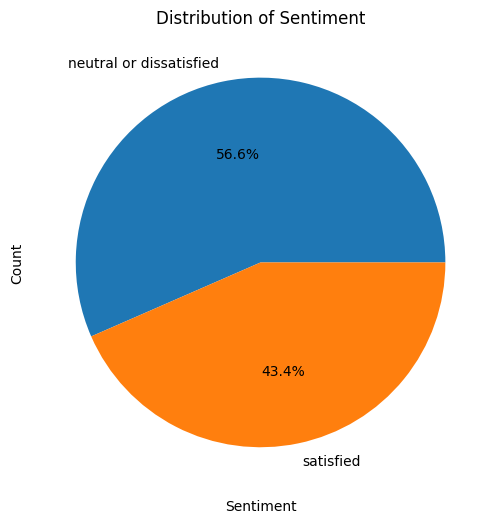

In [7]:
plt.figure(figsize=(10,6))
plt.pie(df["satisfaction"].value_counts(), labels=df["satisfaction"].value_counts().index, autopct="%1.1f%%")
plt.title("Distribution of Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

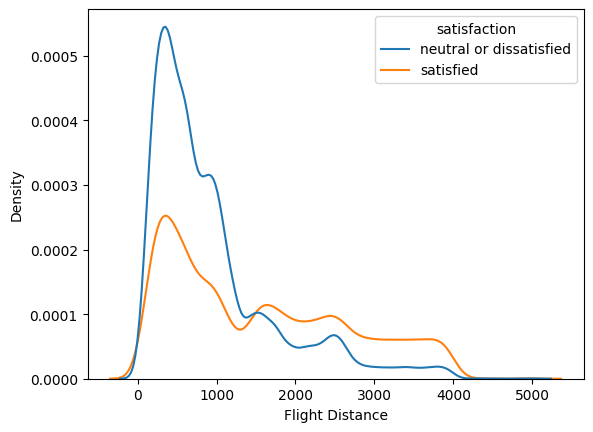

In [8]:
from seaborn import kdeplot

kdeplot(data=df, x='Flight Distance', hue='satisfaction')
plt.show()


## Data Preprocessing

In [9]:
df.dropna(inplace=True)
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
type                                 0
dtype: int64

In [10]:
# Encode Categorical Data
df_train = df.copy()
df_train['label'] = df_train['satisfaction'].apply(lambda x:1 if x == 'satisfied' else 0)

encode_cols = ["Gender", "Customer Type", "Type of Travel", "Class"]
df_encoded = pd.get_dummies(df[encode_cols], columns=encode_cols)
df_encoded = df_encoded.astype(int)

display(df_encoded.head())


,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
id,,,,,,,,,
70172,0,1,1,0,0,1,0,0,1
5047,0,1,0,1,1,0,1,0,0
110028,1,0,1,0,1,0,1,0,0
24026,1,0,1,0,1,0,1,0,0
119299,0,1,1,0,1,0,1,0,0


In [11]:
# Drop unnecesaary columns
dropped_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
df_train = df_train.drop(dropped_cols, axis=1)

### Model Training

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create train dataset
X_train = y_train = df_train[df_train['type'] == 'train']
X_train = X_train.drop(['type', 'label'], axis=1)
y_train = y_train['label']

# Create test dataset
X_test = y_test = df_train[df_train['type'] == 'test']
X_test = X_test.drop(['type', 'label'], axis=1)
y_test = y_test['label']

# Create model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [13]:
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9492913142548179
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     14528
           1       0.96      0.92      0.94     11365

    accuracy                           0.95     25893
   macro avg       0.95      0.95      0.95     25893
weighted avg       0.95      0.95      0.95     25893



### Fine Tuning

In [15]:
### Fine Tuning Function ###
# from sklearn.model_selection import GridSearchCV

# def fine_tune_options(results):
#     print('BEST PARAMS: {}\n'.format(results.best_params_))

#     means = results.cv_results_['mean_test_score']
#     stds = results.cv_results_['std_test_score']
#     for mean, std, params in zip(means, stds, results.cv_results_['params']):
#         print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

# rf = RandomForestClassifier()
# parameters = {
#     'n_estimators': [5,50,100],
#     'max_depth': [2,10,20,None]
# }

# ### Fine Tuning Models ###
# cv = GridSearchCV(rf,parameters)
# cv.fit(X_train,y_train)
# fine_tune_options(cv)

### Visualization Model ###

In [16]:
from sklearn.tree import plot_tree
def plot_feature_importance(model,feature_names, n_features=10, figsize=(10,6)):
    # Get feature importances
    importances = model.feature_importances_
    
    # Sort features by importance
    indices = np.argsort(importances)[::-1]
    
    # Plot top n_features
    plt.figure(figsize=figsize)
    plt.title('Top Feature Importances in Sentiment Analysis')
    
    # Plot only top n_features
    n = min(n_features, len(importances))
    plt.bar(range(n), 
            importances[indices][:n],
            align='center')
    
    # Use actual words as labels
    plt.xticks(range(n), 
               [feature_names[i] for i in indices[:n]], 
               rotation=45,
               ha='right')
    
    plt.xlabel('Features')
    plt.ylabel('Importance Score')
    plt.tight_layout()
    plt.show()

def plot_decision_tree(model, max_depth=3, figsize=(20,10)):
    plt.figure(figsize=figsize)
    # Get a single tree from the forest
    tree = model.estimators_[0]
    
    # Create feature names for all dimensions
    feature_names = [f'dim_{i}' for i in range(model.n_features_in_)]
    
    plot_tree(tree, 
             feature_names=feature_names,
             max_depth=max_depth,
             filled=True,
             rounded=True)
    plt.show()

In [17]:
feature_names = X_train.columns
# plot_decision_tree(model, max_depth=3)

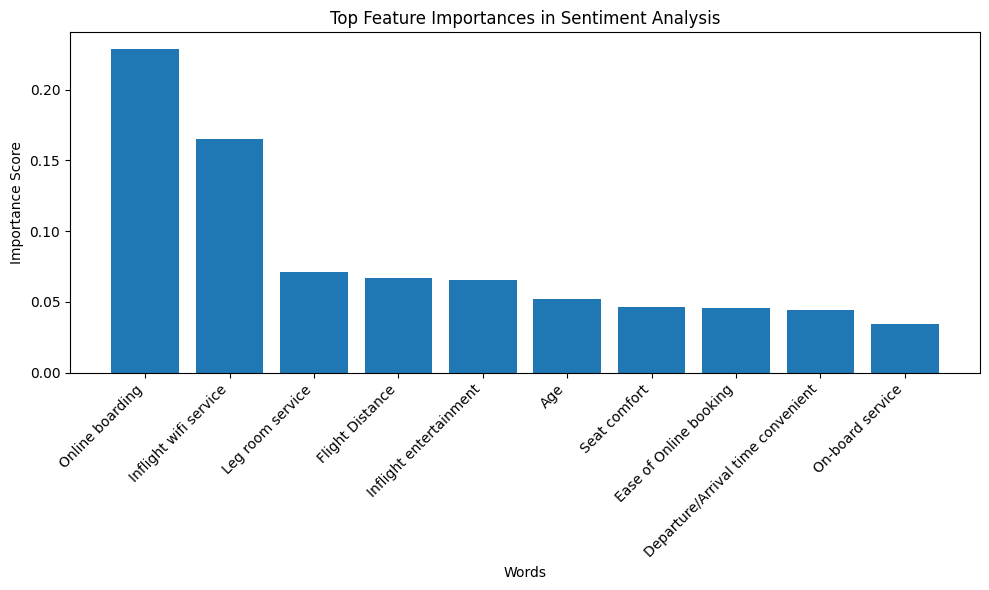

In [18]:

plot_feature_importance(model, feature_names)

### Tiered Sentiment Analysis

In [19]:
# Encode Categorical Data
df_class_train = df.copy()
df_class_train['label'] = df_class_train['satisfaction'].apply(lambda x:1 if x == 'satisfied' else 0)

encode_cols = ["Gender", "Customer Type", "Type of Travel", "Class"]
df_encoded = pd.get_dummies(df[encode_cols], columns=encode_cols)
df_encoded = df_encoded.astype(int)

display(df_encoded.head())

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
id,,,,,,,,,
70172,0,1,1,0,0,1,0,0,1
5047,0,1,0,1,1,0,1,0,0
110028,1,0,1,0,1,0,1,0,0
24026,1,0,1,0,1,0,1,0,0
119299,0,1,1,0,1,0,1,0,0


In [27]:
def plot_feature_importance(model,feature_names, n_features=10, figsize=(10,6)):
    # Get feature importances
    importances = model.feature_importances_
    
    # Sort features by importance
    indices = np.argsort(importances)[::-1]
    
    # Plot top n_features
    plt.figure(figsize=figsize)
    plt.title('Top Feature Importances in Sentiment Analysis')
    
    # Plot only top n_features
    n = min(n_features, len(importances))
    plt.bar(range(n), 
            importances[indices][:n],
            align='center')
    
    # Use actual words as labels
    plt.xticks(range(n), 
               [feature_names[i] for i in indices[:n]], 
               rotation=45,
               ha='right')
    
    plt.xlabel('Features')
    plt.ylabel('Importance Score')
    plt.tight_layout()
    plot = plt.show()

In [45]:
import warnings
warnings.filterwarnings("ignore")

# Empty dictionaries to store importances and feature names
all_importances = {}
all_feature_names = set()

In [64]:
# Define original features that will be one-hot encoded
original_features = ["Gender", "Customer Type", "Type of Travel", "Class"]
all_importances = {}
all_feature_names = set()

for tier in df['Class'].unique():
    print(f"\nProcessing {tier}")
    
    # Get data for this tier
    df_tier = df[df['Class'] == tier]
    
    # Create encoded features
    df_encoded = pd.get_dummies(df_tier[original_features], columns=original_features)
    df_encoded = df_encoded.astype(int)
    
    # Add encoded columns back
    df_processed = df_tier.drop(original_features, axis=1)
    df_processed = pd.concat([df_processed, df_encoded], axis=1)
    
    # Create label
    df_processed['label'] = df_processed['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)
    
    # Split data
    train_mask = df_processed['type'] == 'train'
    df_train = df_processed[train_mask]
    
    # Prepare features and target
    dropped_cols = ['type', 'label', 'satisfaction']
    X_tier = df_train.drop(dropped_cols, axis=1)
    y_tier = df_train['label']
    # print(X_tier.columns)
    
    # Train model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_tier, y_tier)
    
    # Aggregate importance scores for encoded features
    aggregated_importance = {}
    for col, imp in zip(X_tier.columns, model.feature_importances_):
        # Check if column is from one-hot encoding
        matched = False
        for feature in original_features:
            if col.startswith(feature + "_"):
                aggregated_importance[feature] = aggregated_importance.get(feature, 0) + imp
                matched = True
                break
        # If not encoded, use original column name
        if not matched:
            aggregated_importance[col] = imp
    
    # Store aggregated importances
    all_importances[tier] = {
        'importances': list(aggregated_importance.values()),
        'features': list(aggregated_importance.keys())
    }
    all_feature_names.update(aggregated_importance.keys())


Processing Eco Plus

Processing Business

Processing Eco


In [73]:
for i in all_importances:
    print(all_importances[i])
# display(all_importances)  

{'importances': [0.03830964496365305, 0.03736796014568831, 0.2906229484060807, 0.016791298664662283, 0.04866764245541984, 0.013365109865799722, 0.022587767278035065, 0.10676280472420846, 0.02432822835801241, 0.05051442364259671, 0.019952124511151737, 0.018354966261571976, 0.035887009945174415, 0.026776341444113956, 0.02911162247198223, 0.020866232301469046, 0.01829790398372728, 0.022098567215437095, 0.012324430699902165, 0.036572206765781774, 0.11044076589553176, 0.0], 'features': ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Gender', 'Customer Type', 'Type of Travel', 'Class']}
{'importances': [0.03606478860614955, 0.02326497512705188, 0.113489621954021

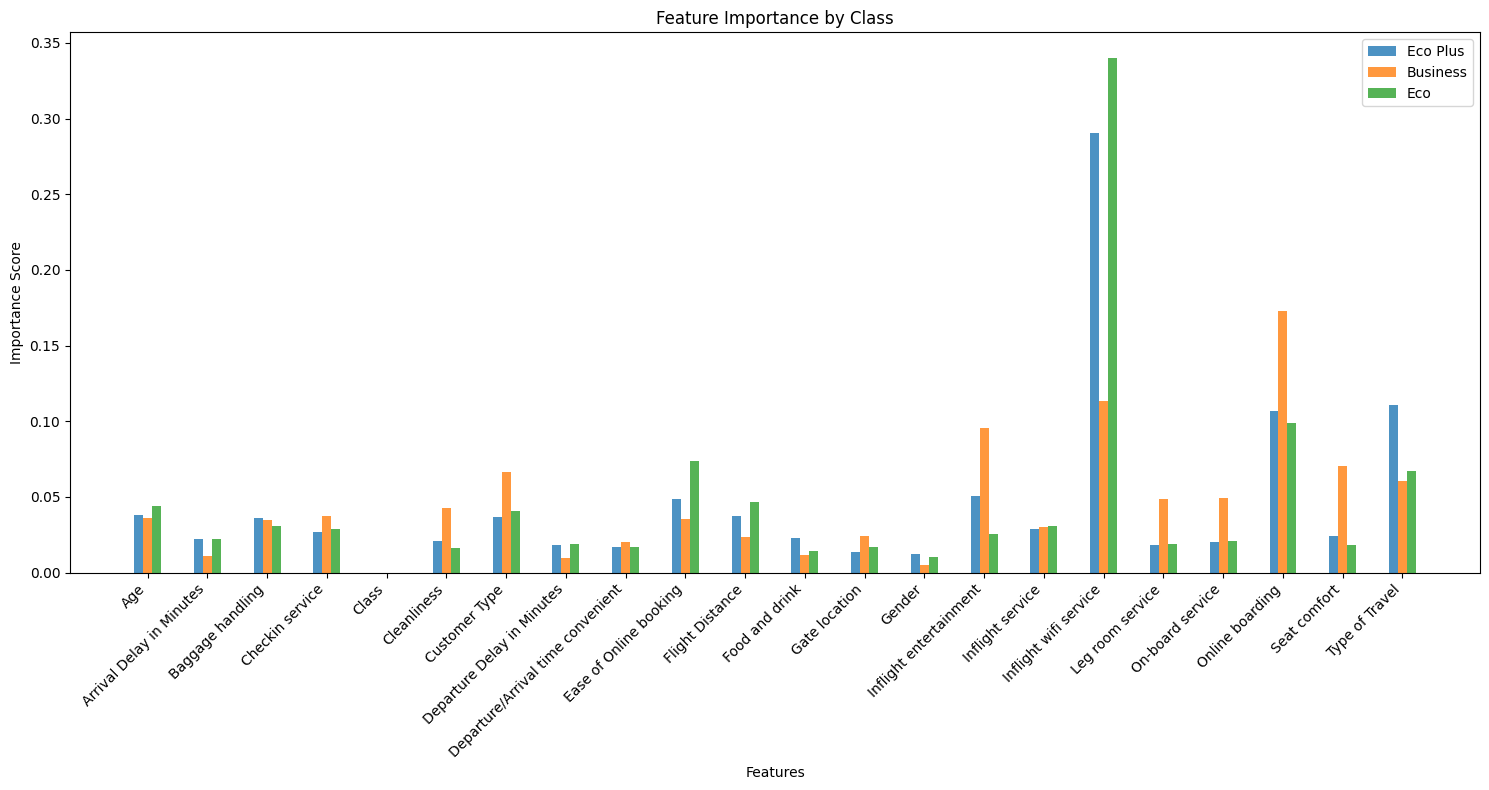

In [74]:
all_feature_names = sorted(list(all_feature_names))

# Create x positions for bars
x = np.arange(len(all_feature_names))

# Create figure for all plots
plt.figure(figsize=(15, 8))
bar_width = 0.15
opacity = 0.8

# Plot bars for each tier
for idx, (tier, data) in enumerate(all_importances.items()):
    # Create importance array matching all_feature_names
    importances = np.zeros(len(all_feature_names))
    for i, feature in enumerate(data['features']):
        feature_idx = all_feature_names.index(feature)
        importances[feature_idx] = data['importances'][i]
    
    plt.bar(x + idx * bar_width, 
           importances,
           bar_width,
           alpha=opacity,
           label=tier)

# Customize plot
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance by Class')
plt.xticks(x + bar_width * (len(all_importances) - 1) / 2,
           all_feature_names,
           rotation=45,
           ha='right')
plt.legend()
plt.tight_layout()
plt.show()
